In [90]:
#!pip install pytesseract

In [1]:
import cv2
import re
import pytesseract
from pytesseract import Output 
import matplotlib.pyplot as plt

In [2]:
img_path = r"test_img/test_5.png"
img_size= (512,256)

In [3]:
def read_img(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    #image = cv2.resize(image,(img_size))
    return image
    

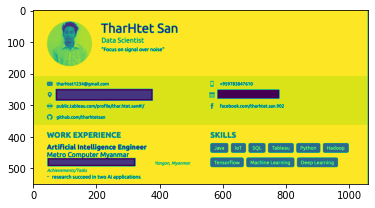

In [4]:
img = read_img(img_path)
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img)

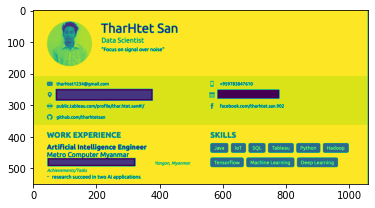

In [5]:
blur_img = cv2.medianBlur(gray_img,3)
plt.imshow(gray_img)

In [6]:
print("cv2.THRESH_BINARY : ",cv2.THRESH_BINARY)
print("cv2.THRESH_OTSU : ",cv2.THRESH_OTSU)

cv2.THRESH_BINARY :  0
cv2.THRESH_OTSU :  8


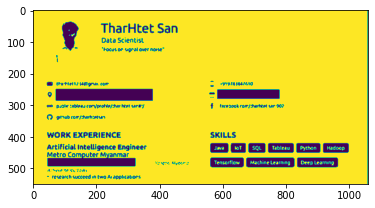

In [7]:
threshold_img = cv2.threshold(blur_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
plt.imshow(threshold_img )

### Tesseract detect

In [8]:
height,width,channel = img.shape
output_img = img.copy()
boxes = pytesseract.image_to_boxes(img)
#print(boxes)

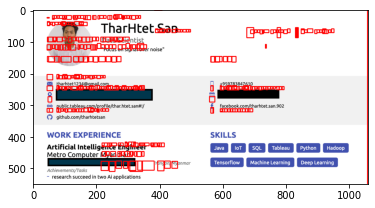

In [9]:
for b in boxes.splitlines():
    b = b.split(' ')
    #print(b)
    start_point = (int(b[1]),int(b[2]))
    end_point = (int(b[3]),int(b[4]))
    rect_color = (255,0,0)
    
    #print("start_point : " ,start_point)
    #print("end_point : ",end_point)
    img = cv2.rectangle(img, start_point,end_point,rect_color,2)
    
plt.imshow(img)

In [10]:
import pytesseract
from pytesseract import Output 
data = pytesseract.image_to_data(gray_img,output_type = 'dict')

In [11]:
print(data['text'])
print(data['conf'])

['', '', '', '', 'TharHtet', 'San', '', '', '', 'Data', 'Scientist', '', '>', '"Focus', 'on', 'signal', 'over', 'noise"', '', '', '', '54', 'tharhtet1234@gmail.com', '', '0', '', '©', 'public.tableau.com/profile/thar.htet-sanit!/', '', '', '', '©', 'github.com/tharhtetsan', '', '', '', 'WORK', 'EXPERIENCE', '', 'Artificial', 'Intelligence', 'Engineer', '', '', '', 'Metro', '—_', 'Se', '', '', '', 'Achievements/Tasks', '', '~', 'research', 'succeed', 'in', 'two', 'Ai', 'applications', '', '', '', 'Yangon,', 'Myanmar', '', '', '', 'Q)', '+959783847610', '', '', '', ':', '', '', '', ' _', 'facebook.com/tharhtet.san.902', '', '', '', 'SKILLS', '', '', '', 'Machine', 'Learning', '{|', 'Deep', 'Learning', '', '', '', '  ', '', '', '', '']
[-1, -1, -1, -1, 90, 96, -1, -1, -1, 95, 95, -1, 40, 84, 96, 96, 96, 92, -1, -1, -1, 15, 69, -1, 22, -1, 62, 35, -1, -1, -1, 62, 62, -1, -1, -1, 96, 95, -1, 96, 96, 96, -1, -1, -1, 95, 26, 31, -1, -1, -1, 89, -1, 69, 93, 86, 96, 96, 88, 89, -1, -1, -1, 94, 

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])
99
TharHtet
Data
Scientist
"Focus
signal
over
noise"
WORK
EXPERIENCE
Artificial
Intelligence
Engineer
Metro
Achievements/Tasks
research
succeed
applications
Yangon,
Myanmar
SKILLS
Machine
Learning
Deep
Learning


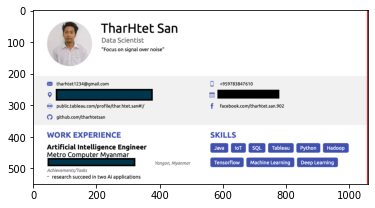

In [12]:
print(data.keys())
n_boxes = len(data['text'])
print(n_boxes)
for i in range(n_boxes):
    if int(float(data['conf'][i])) > 80 and len(data['text'][i]) >3:
        print(data['text'][i])
        (x,y,w,h) = (data['left'][i],data['top'][i],data['width'][i],data['height'][i])
        start_point = (int(b[1]),int(b[2]))
        end_point = (int(b[3]),int(b[4]))
        rect_color = (255,0,0)
        output_img = cv2.rectangle(output_img, start_point,end_point,rect_color,2)
        
plt.imshow(output_img)